<a href="https://colab.research.google.com/github/amita-kapoor/Designing-Models-for-Responsible-AI/blob/main/Chapter9/ExploringChurnModellingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

**Importing the Dataset**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Lime-Model-Interpretation/main/Churn_Modelling.csv')

data.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [ ]:
# Checking if our dataset contains any NULL values

data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Data Analysis**

In [ ]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 16}

plt.rc('font', **font)

In [ ]:
# setting  the axes attributes 
# before the call to subplot
#plt.rc('font', weight ='bold')
plt.rc('xtick.major', size = 5, pad = 7)
plt.rc('xtick', labelsize = 12)
# setting aliases for color, linestyle 
# and linewidth; gray, solid, thick
plt.rc('grid', c ='0.3', ls ='-', lw = 4)
plt.rc('lines', lw = 2, color ='g')

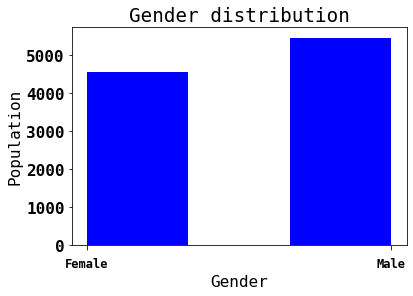

In [ ]:
# Plotting the features of the dataset to see the correlation between them

plt.hist(x = data.Gender, bins = 3, color = 'blue')
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Population')
plt.show()

In [ ]:
data['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [ ]:
# import the necessary libraries
import seaborn as sns

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


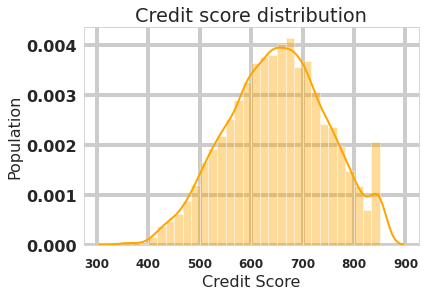

In [ ]:
# comparison of CreditScore in the dataset
sns.set_style('whitegrid')
sns.distplot(data.CreditScore, kde = True, color ='orange', bins = 30)
#plt.hist(x = data.CreditScore, bins = 15, color = 'orange')
plt.title('Credit score distribution')
plt.xlabel('Credit Score')
plt.ylabel('Population')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


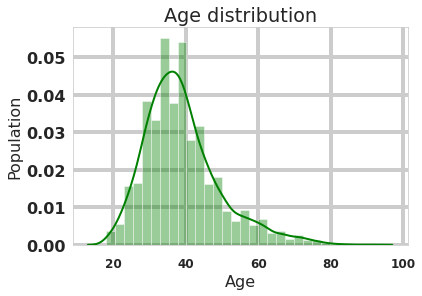

In [ ]:
# comparison of age in the dataset
sns.set_style('whitegrid')
sns.distplot(data.Age, kde = True, color ='green', bins = 30)
#plt.hist(x = data.Age, bins = 15, color = 'green')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Population')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


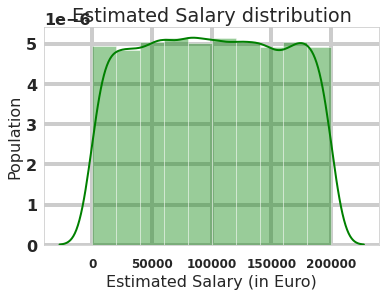

In [ ]:
# comparison of age in the dataset
sns.set_style('whitegrid')
sns.distplot(data.EstimatedSalary, kde = True, color ='green', bins = 10)
#plt.hist(x = data.Age, bins = 15, color = 'green')
plt.title('Estimated Salary distribution')
plt.xlabel('Estimated Salary (in Euro)')
plt.ylabel('Population')
plt.show()

In [ ]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

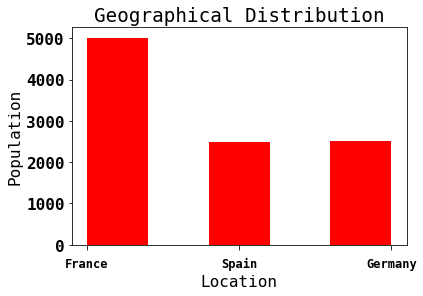

In [ ]:
# comparison of geography

plt.hist(x = data.Geography, bins = 5, color = 'red')
plt.title('Geographical Distribution')
plt.xlabel('Location')
plt.ylabel('Population')
plt.show()

In [ ]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

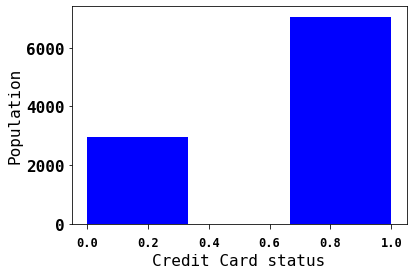

In [ ]:
# comparision of how many customers hold the credit card

plt.hist(x = data.HasCrCard, bins = 3, color = 'blue', label='No Card')
plt.title('')
plt.xlabel('Credit Card status')
plt.ylabel('Population')
plt.show()

In [ ]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

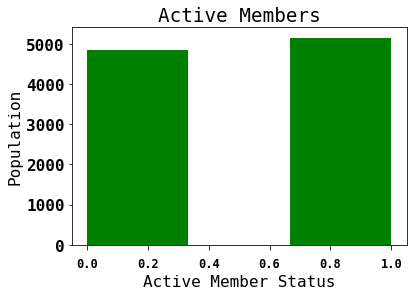

In [ ]:
# How many active member does the bank have ?

plt.hist(x = data.IsActiveMember, bins = 3, color = 'green')
plt.title('Active Members')
plt.xlabel('Active Member Status')
plt.ylabel('Population')
plt.show()